*I confirm that this is my own work, except where clearly indicated*

## Covid-19 Global Forecasting (Week 2)

#### Framing the problem:

Forecasting **confirmed cases** and **fatalities** betwen April 1  April 30 by region and identify **factors** that impact transmission rate of Covid-19

Predicting specific values based on labeled training examples
<br>
=> Supervised Learning Task & Mutlivariate Regression Problem

#### Performance Measure

**Root Mean Sqaure Error (RMSE)** : Indicates how much error the system typically makes in its predictions, with higher weight for larger errors 

**Root Mean Squared Log Error (RMSLE)** : Performance measure used by kaggle - more robust performance measure when outliers come into play 
= Provides relative error between predicted and actual error (larger penalty for underestimationg of actual variable than overestimation)

**Case: Covid-19 Forecasting** <br>
RMSLE usueful for Covid-19 case where the underestimation of target variable is not acceptable while overestimation can be tolerated

In [0]:
#Loading packages 

#Data Exploration
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#Data Preparation
import datetime
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn import preprocessing 
from sklearn.compose import ColumnTransformer
#Model Testing
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import RepeatedKFold
#Model evaluation
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
#from sklearn.model_selection import cross_val_predict
from numpy import absolute
from numpy import mean
from numpy import std

In [4]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

#Data-API
!kaggle competitions download -c covid19-global-forecasting-week-2

kaggle.json
  0% 0.00/765k [00:00<?, ?B/s]
100% 765k/765k [00:00<00:00, 52.2MB/s]
  0% 0.00/357k [00:00<?, ?B/s]
100% 357k/357k [00:00<00:00, 48.8MB/s]
  0% 0.00/113k [00:00<?, ?B/s]
100% 113k/113k [00:00<00:00, 39.7MB/s]


Additional dataset: **population by country (2020)** <br>
* Description: sortable list of countries by their population- 2020. There are 235 countries along with their population. And there are 11 columns each representing different features of countries.

* Columns: <br>
  * Country (or dependency)This column contains different country's name (235 countries) 
  * Population (2020)This columns contains the population of different countries
  * Yearly ChangeThis columns contains the population change by yearly
  * Net ChangeThis columns contains the net change of the population
  * Density (P/Km²)The column contains the density of the population
  * Land Area (Km²)This column contain the land area in terms of kilometer square
  * Migrants (net)This column represents the migrants of the countries
  * Fert. RateThis column represents the fertility or the growth rate of individual countries
 * Med. AgeThis column represents the median age (Middle Age or the average age) lifespan of the country
  * Urban Pop %This column represents the urban population
 * World ShareThis column represents the population contributed to the world's share by individual country


In [6]:
uploaded = files.upload()

Saving population_by_country_2020.csv to population_by_country_2020.csv


In [0]:
# Import the test and train datasets into pandas dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
#import countryinfo and covidtest datasets into pandas dataframe
df_population = pd.read_csv('population_by_country_2020.csv')

##Explore and Clean Data


In [10]:
#print first and last rows of datasets
print("TRAIN:", train.shape)
train.iloc[np.r_[0:5, -6:-1], :]
#target: ConfirmedCases and Fatalities

TRAIN: (20580, 6)


,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
20574,29365,NaN,Zimbabwe,2020-03-26,3.0,1.0
20575,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0
20576,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0
20577,29368,NaN,Zimbabwe,2020-03-29,7.0,1.0
20578,29369,NaN,Zimbabwe,2020-03-30,7.0,1.0


In [11]:
print("TEST:", test.shape)
test.iloc[np.r_[0:5, -6:-1], :]

TEST: (12642, 4)


,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23
12636,12637,NaN,Zimbabwe,2020-04-25
12637,12638,NaN,Zimbabwe,2020-04-26
12638,12639,NaN,Zimbabwe,2020-04-27
12639,12640,NaN,Zimbabwe,2020-04-28
12640,12641,NaN,Zimbabwe,2020-04-29


In [12]:
print("POPULATION INFO:", df_population.shape)
df_population.iloc[np.r_[0:5, -6:-1], :]

POPULATION INFO: (235, 11)


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
229,Saint Pierre & Miquelon,5800,-0.48 %,-28,25,230,NaN,N.A.,N.A.,100 %,0.00 %
230,Montserrat,4991,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [13]:
print('POPULATION COLUMN NAMES', df_population.columns)
print('COVID DATA COLUMN NAMES', train.columns)

POPULATION COLUMN NAMES Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')
COVID DATA COLUMN NAMES Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')


## Transform Population Data to match Train/Test data

In [0]:
#rename columns
train.rename(columns={'Country_Region':'Country'}, inplace=True)
test.rename(columns={'Country_Region':'Country'}, inplace=True)
df_population.rename(columns={'Country (or dependency)':'Country'}, inplace=True)

In [15]:
#Top 20 overview of target variables
train.loc[:, ['Country', 'ConfirmedCases', 'Fatalities']].groupby(['Country']).max().sort_values(by = 'ConfirmedCases', ascending=False).reset_index()[:20].style.background_gradient()

,Country,ConfirmedCases,Fatalities
0,Italy,105792.000000,12428.000000
1,Spain,95923.000000,8464.000000
2,US,75833.000000,1550.000000
3,Germany,71808.000000,775.000000
4,China,67801.000000,3187.000000
5,France,52128.000000,3523.000000
6,Iran,44605.000000,2898.000000
7,United Kingdom,25150.000000,1789.000000
8,Switzerland,16605.000000,433.000000
9,Turkey,13531.000000,214.000000


In [0]:
# top_10_countries = train.groupby('country')['Date', 'ConfirmedCases', 'Fatalities'].max().sort_values(by='ConfirmedCases', ascending=False).reset_index().loc[:, 'country'][:10]
# df_plot = train.loc[train.country.isin(top_10_countries), ['Date', 'country', 'ConfirmedCases', 'Fatalities']].groupby(['Date', 'country']).max().reset_index()

# fig = px.line(df_plot, x="Date", y="ConfirmedCases", color='country')
# fig.update_layout(title='No.of Confirmed Cases per Day for Top 20 Countries',
#                    xaxis_title='Date',
#                    yaxis_title='No.of Confirmed Cases')
# fig.show()

**Country Names**

In [16]:
#check if country names match
train_countries = train.Country.unique().tolist()
pop_countries = df_population.Country.unique().tolist()
for country in train_countries:
  if country not in pop_countries:
    print(country) 


Congo (Brazzaville)
Congo (Kinshasa)
Cote d'Ivoire
Czechia
Diamond Princess
Korea, South
Saint Kitts and Nevis
Saint Vincent and the Grenadines
Taiwan*
US


**note**: Diamond Princess is not a country but a *cruise* 

In [0]:
#check the country names used in df_population (commented out bc it's a long alphabetical list)

#pop_countries

In [0]:
#replace the ones with matching names (only missing Diamond Princess)
matchCountrywithPop = {
    "Congo (Brazzaville)": "Congo",
    "Congo (Kinshasa)": "Congo",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Czechia": "Czech Republic (Czechia)",
    "Korea, South": "South Korea",
    "Saint Kitts and Nevis": "Saint Kitts & Nevis",
    "Saint Vincent and the Grenadines": "St. Vincent & Grenadines",
    "Taiwan*": "Taiwan",
    "US": "United States"
}

train.replace({'Country': matchCountrywithPop}, inplace=True)
test.replace({'Country': matchCountrywithPop}, inplace=True)

In [19]:
df_population.describe()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,3.309773e+07,3.460878e+05,475.770213,5.535918e+05,6.283582
std,1.349417e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000
25%,3.981150e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000
50%,5.459116e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000
75%,2.045283e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000
max,1.438207e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000


**Null/NaN values**

In [20]:
df_population.isnull().sum() # null values in migrants

Country               0
Population (2020)     0
Yearly Change         0
Net Change            0
Density (P/Km²)       0
Land Area (Km²)       0
Migrants (net)       34
Fert. Rate            0
Med. Age              0
Urban Pop %           0
World Share           0
dtype: int64

In [21]:
#check NaN values 
print(
    df_population.loc[df_population['Population (2020)'] =='N.A.', 'Population (2020)'].value_counts(), '\n',
    df_population.loc[df_population['Yearly Change'] =='N.A.', 'Yearly Change'].value_counts(), '\n',
    df_population.loc[df_population['Net Change'] =='N.A.', 'Net Change'].value_counts(), '\n',
    df_population.loc[df_population['Density (P/Km²)'] =='N.A.', 'Density (P/Km²)'].value_counts(), '\n',
    df_population.loc[df_population['Land Area (Km²)'] =='N.A.', 'Land Area (Km²)'].value_counts(), '\n',
    df_population.loc[df_population['Migrants (net)'] =='N.A.', 'Migrants (net)'].value_counts(), '\n',
    df_population.loc[df_population['Fert. Rate'] =='N.A.', 'Fert. Rate'].value_counts(), '\n',
    df_population.loc[df_population['Med. Age'] =='N.A.', 'Med. Age'].value_counts(), '\n',
    df_population.loc[df_population['Urban Pop %'] =='N.A.', 'Urban Pop %'].value_counts(), '\n',
    df_population.loc[df_population['World Share'] =='N.A.', 'World Share'].value_counts())
#NaN values in fert rate, med age and urban pop

Series([], Name: Population (2020), dtype: int64) 
 Series([], Name: Yearly Change, dtype: int64) 
 Series([], Name: Net Change, dtype: int64) 
 Series([], Name: Density (P/Km²), dtype: int64) 
 Series([], Name: Land Area (Km²), dtype: int64) 
 Series([], Name: Migrants (net), dtype: int64) 
 N.A.    34
Name: Fert. Rate, dtype: int64 
 N.A.    34
Name: Med. Age, dtype: int64 
 N.A.    13
Name: Urban Pop %, dtype: int64 
 Series([], Name: World Share, dtype: int64)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [0]:
#dealing with null values : Replace NaN with mode and migrants null values with 0

#The mode of a set of values is the value that appears most often. 
#axis [0]: get mode of each column
df_population.loc[df_population['Fert. Rate']=='N.A.', 'Fert. Rate'] = df_population.loc[df_population['Fert. Rate']!='N.A.', 'Fert. Rate'].mode()[0]
df_population.loc[df_population['Urban Pop %']=='N.A.', 'Urban Pop %'] = df_population.loc[df_population['Urban Pop %']!='N.A.', 'Urban Pop %'].mode()[0]
df_population.loc[df_population['Med. Age']=='N.A.', 'Med. Age'] = df_population.loc[df_population['Med. Age']!='N.A.', 'Med. Age'].mode()[0]

df_population.loc[:, 'Migrants (net)'] = df_population.loc[:, 'Migrants (net)'].fillna(0)


In [0]:
#df_population.iloc[np.r_[0:5, -6:-1], :]

In [0]:
#remove characters in data '%'

df_population['Yearly Change'] = df_population['Yearly Change'].str.rstrip('%')
df_population['World Share'] = df_population['World Share'].str.rstrip('%')
df_population['Urban Pop %'] = df_population['Urban Pop %'].str.rstrip('%')

In [24]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            235 non-null    object 
 1   Population (2020)  235 non-null    int64  
 2   Yearly Change      235 non-null    object 
 3   Net Change         235 non-null    int64  
 4   Density (P/Km²)    235 non-null    int64  
 5   Land Area (Km²)    235 non-null    int64  
 6   Migrants (net)     235 non-null    float64
 7   Fert. Rate         235 non-null    object 
 8   Med. Age           235 non-null    object 
 9   Urban Pop %        235 non-null    object 
 10  World Share        235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [0]:
#adapt dtype - obj into float or int
df_population = df_population.astype({"Net Change": int,"Density (P/Km²)": int,"Population (2020)": int,"Land Area (Km²)": int,"Yearly Change": float,"Urban Pop %": int,"Fert. Rate": float,"Med. Age": int,"World Share": float, "Migrants (net)": float,})

In [26]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            235 non-null    object 
 1   Population (2020)  235 non-null    int64  
 2   Yearly Change      235 non-null    float64
 3   Net Change         235 non-null    int64  
 4   Density (P/Km²)    235 non-null    int64  
 5   Land Area (Km²)    235 non-null    int64  
 6   Migrants (net)     235 non-null    float64
 7   Fert. Rate         235 non-null    float64
 8   Med. Age           235 non-null    int64  
 9   Urban Pop %        235 non-null    int64  
 10  World Share        235 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 20.3+ KB


**Diamond Princess**

In [27]:
train[train.eq('Diamond Princess').any(1)]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,Id,Province_State,Country,Date,ConfirmedCases,Fatalities
6580,9401,NaN,Diamond Princess,2020-01-22,0.0,0.0
6581,9402,NaN,Diamond Princess,2020-01-23,0.0,0.0
6582,9403,NaN,Diamond Princess,2020-01-24,0.0,0.0
6583,9404,NaN,Diamond Princess,2020-01-25,0.0,0.0
6584,9405,NaN,Diamond Princess,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
6645,9466,NaN,Diamond Princess,2020-03-27,712.0,10.0
6646,9467,NaN,Diamond Princess,2020-03-28,712.0,10.0
6647,9468,NaN,Diamond Princess,2020-03-29,712.0,10.0
6648,9469,NaN,Diamond Princess,2020-03-30,712.0,10.0


In [0]:
#Dealing with Diamond Princess - add data
#https://en.wikipedia.org/wiki/COVID-19_pandemic_on_cruise_ships
#https://en.wikipedia.org/wiki/COVID-19_pandemic_on_Diamond_Princess#Demographics
#https://cmmid.github.io/topics/covid19/diamond_cruise_cfr_estimates.html 
#only data available: number of passengers, median age of passengers, fertility rate

df_population = df_population.append(pd.Series(['Diamond Princess', 3711, 0, 0, 0, 0, 0.0, 1, 69, 0, 0.0], index=df_population.columns ), ignore_index=True)

In [29]:
df_population.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.360000e+02,236.000000,2.360000e+02,236.000000,2.360000e+02,236.000000,236.000000,236.000000,236.000000,236.000000
mean,3.295750e+07,1.099873,3.446214e+05,473.754237,5.512461e+05,5.351695,2.557203,29.097458,58.860169,0.423644
std,1.346715e+08,1.075761,1.126083e+06,2326.526605,1.684587e+06,113740.613982,1.212379,9.715256,23.815995,1.730252
min,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.000000,15.000000,0.000000,0.000000
25%,3.952092e+05,0.315000,3.932500e+02,35.750000,2.382500e+03,-8480.500000,1.800000,19.000000,43.000000,0.010000
50%,5.435874e+06,0.970000,3.845600e+04,94.500000,7.579000e+04,0.000000,2.000000,28.000000,58.000000,0.070000
75%,2.028905e+07,1.850000,2.410415e+05,239.250000,4.005600e+05,4850.000000,3.100000,38.000000,78.250000,0.262500
max,1.438207e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,69.000000,100.000000,18.470000


### Merging Dataset

In [0]:
train = train.merge(df_population, how='left', left_on='Country', right_on='Country')
test = test.merge(df_population, how='left', left_on='Country', right_on='Country')

In [31]:
train.info()
#train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20580 entries, 0 to 20579
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 20580 non-null  int64  
 1   Province_State     8750 non-null   object 
 2   Country            20580 non-null  object 
 3   Date               20580 non-null  object 
 4   ConfirmedCases     20580 non-null  float64
 5   Fatalities         20580 non-null  float64
 6   Population (2020)  20580 non-null  int64  
 7   Yearly Change      20580 non-null  float64
 8   Net Change         20580 non-null  int64  
 9   Density (P/Km²)    20580 non-null  int64  
 10  Land Area (Km²)    20580 non-null  int64  
 11  Migrants (net)     20580 non-null  float64
 12  Fert. Rate         20580 non-null  float64
 13  Med. Age           20580 non-null  int64  
 14  Urban Pop %        20580 non-null  int64  
 15  World Share        20580 non-null  float64
dtypes: float64(6), int64(7

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12642 entries, 0 to 12641
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ForecastId         12642 non-null  int64  
 1   Province_State     5375 non-null   object 
 2   Country            12642 non-null  object 
 3   Date               12642 non-null  object 
 4   Population (2020)  12642 non-null  int64  
 5   Yearly Change      12642 non-null  float64
 6   Net Change         12642 non-null  int64  
 7   Density (P/Km²)    12642 non-null  int64  
 8   Land Area (Km²)    12642 non-null  int64  
 9   Migrants (net)     12642 non-null  float64
 10  Fert. Rate         12642 non-null  float64
 11  Med. Age           12642 non-null  int64  
 12  Urban Pop %        12642 non-null  int64  
 13  World Share        12642 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 1.4+ MB


In [0]:
#df_population.info()

###Complete Data Cleaning


Date
2020-03-30    2659.717687
2020-03-29    2448.040816
Name: ConfirmedCases, dtype: float64
Date
2020-03-27    2017.047619
2020-03-26    1800.482993
2020-03-25    1590.149660
Name: ConfirmedCases, dtype: float64


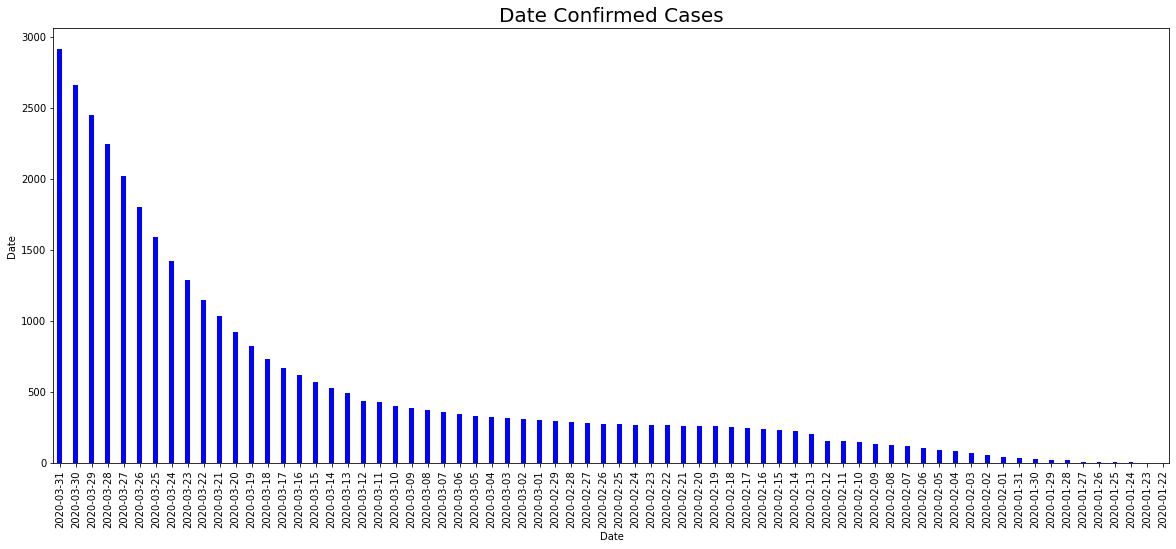

In [33]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
train.groupby('Date').mean().sort_values(by='ConfirmedCases', ascending=False)['ConfirmedCases'].plot(kind='bar', color='b',width=0.3,title='Date Confirmed Cases', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Date')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(train.groupby('Date').mean().sort_values(by='ConfirmedCases', ascending=False)['ConfirmedCases'][[1,2]])
print(train.groupby('Date').mean().sort_values(by='ConfirmedCases', ascending=False)['ConfirmedCases'][[4,5,6]])

**Date values**

Avoid data leakage: train dataset has records till 31th March 2020 and test has partial intersection of records from 19th March - concise training data until 18 March 2020

In [34]:
#date values
for col in train : 
    print(type(train[col][1]))

<class 'numpy.int64'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>


In [35]:
min_test_date = test.Date.min() #2020-03-19

print('Start test data:', min_test_date, 'End of Train Data', train.Date.max())

Start test data: 2020-03-19 End of Train Data 2020-03-31


In [36]:
#transform date value unto datetime 
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

for col in train : 
    print(type(train[col][1]))
    
for col in test : 
    print(type(test[col][1]))

<class 'numpy.int64'>
<class 'float'>
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'float'>
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>


In [37]:
#end train data below min_test_date: 18th March 2020
train = train.loc[train.Date < min_test_date, :]
train.Date.max()

Timestamp('2020-03-18 00:00:00')

In [0]:
#transform timestamp into int

train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['week'] = train['Date'].dt.week
train['day'] = train['Date'].dt.dayofyear
train['dayofweek'] = train['Date'].dt.dayofweek

test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['week'] = test['Date'].dt.week
test['day'] = test['Date'].dt.dayofyear
test['dayofweek'] = test['Date'].dt.dayofweek

In [39]:
#keep date? drop date? 

train.loc[:, 'Date'] = train.Date.dt.strftime("%m%d")
train["Date"]  = train["Date"].astype(int)

#X_train.drop(columns=['Date'], axis=1, inplace=True)

test.loc[:, 'Date'] = test.Date.dt.strftime("%m%d")
test["Date"]  = test["Date"].astype(int)

#X_test.drop(columns=['Date'], axis=1, inplace=True)
print(train.head(), '\n', test.head())

   Id Province_State      Country  Date  ...  month  week  day  dayofweek
0   1            NaN  Afghanistan   122  ...      1     4   22          2
1   2            NaN  Afghanistan   123  ...      1     4   23          3
2   3            NaN  Afghanistan   124  ...      1     4   24          4
3   4            NaN  Afghanistan   125  ...      1     4   25          5
4   5            NaN  Afghanistan   126  ...      1     4   26          6

[5 rows x 21 columns] 
    ForecastId Province_State      Country  Date  ...  month  week  day  dayofweek
0           1            NaN  Afghanistan   319  ...      3    12   79          3
1           2            NaN  Afghanistan   320  ...      3    12   80          4
2           3            NaN  Afghanistan   321  ...      3    12   81          5
3           4            NaN  Afghanistan   322  ...      3    12   82          6
4           5            NaN  Afghanistan   323  ...      3    13   83          0

[5 rows x 19 columns]


**NaN State values**

remove NaN values and create new variable combining country name and state if available

In [40]:
#train.dropna()? - drops country values too
#Fill NaN?
# Undefined = "UNDEFINED"
# X_train['Province_State'].fillna(Undefined, inplace=True)

#join country_region and province_state
train['Province_State'].fillna('', inplace=True)
train['geo'] = ['_'.join(x) for x in zip(train['Country'], train['Province_State'])]
X_train = train.copy()
X_train

,Id,Province_State,Country,Date,ConfirmedCases,Fatalities,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,year,month,week,day,dayofweek,geo
0,1,,Afghanistan,122,0.0,0.0,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,1,4,22,2,Afghanistan_
1,2,,Afghanistan,123,0.0,0.0,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,1,4,23,3,Afghanistan_
2,3,,Afghanistan,124,0.0,0.0,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,1,4,24,4,Afghanistan_
3,4,,Afghanistan,125,0.0,0.0,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,1,4,25,5,Afghanistan_
4,5,,Afghanistan,126,0.0,0.0,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,1,4,26,6,Afghanistan_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20562,29353,,Zimbabwe,314,0.0,0.0,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,3,11,74,5,Zimbabwe_
20563,29354,,Zimbabwe,315,0.0,0.0,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,3,11,75,6,Zimbabwe_
20564,29355,,Zimbabwe,316,0.0,0.0,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,3,12,76,0,Zimbabwe_
20565,29356,,Zimbabwe,317,0.0,0.0,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,3,12,77,1,Zimbabwe_


In [41]:
#Test set
test['Province_State'].fillna('', inplace=True)
# test['Date'] = pd.to_datetime(test['Date'])
# test['day'] = test.Date.dt.dayofyear
test['geo'] = ['_'.join(x) for x in zip(test['Country'], test['Province_State'])]
X_test = test.copy()
X_test

,ForecastId,Province_State,Country,Date,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,year,month,week,day,dayofweek,geo
0,1,,Afghanistan,319,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,3,12,79,3,Afghanistan_
1,2,,Afghanistan,320,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,3,12,80,4,Afghanistan_
2,3,,Afghanistan,321,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,3,12,81,5,Afghanistan_
3,4,,Afghanistan,322,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,3,12,82,6,Afghanistan_
4,5,,Afghanistan,323,38742911,2.33,886592,60,652860,-62920.0,4.6,18,25,0.50,2020,3,13,83,0,Afghanistan_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,12638,,Zimbabwe,426,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,4,17,117,6,Zimbabwe_
12638,12639,,Zimbabwe,427,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,4,18,118,0,Zimbabwe_
12639,12640,,Zimbabwe,428,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,4,18,119,1,Zimbabwe_
12640,12641,,Zimbabwe,429,14818157,1.48,217456,38,386850,-116858.0,3.6,19,38,0.19,2020,4,18,120,2,Zimbabwe_


In [0]:
#X_train.describe()

**Correlation between attributes**

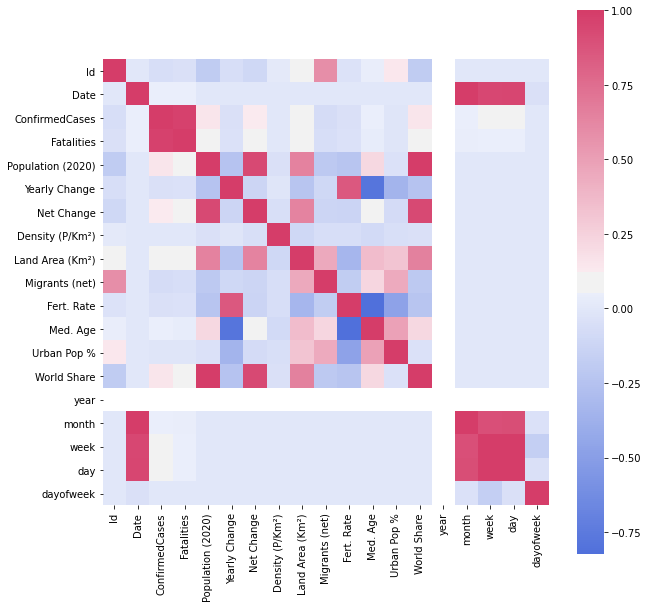

In [42]:
plt.figure(figsize = (10,10))
corr = X_train.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

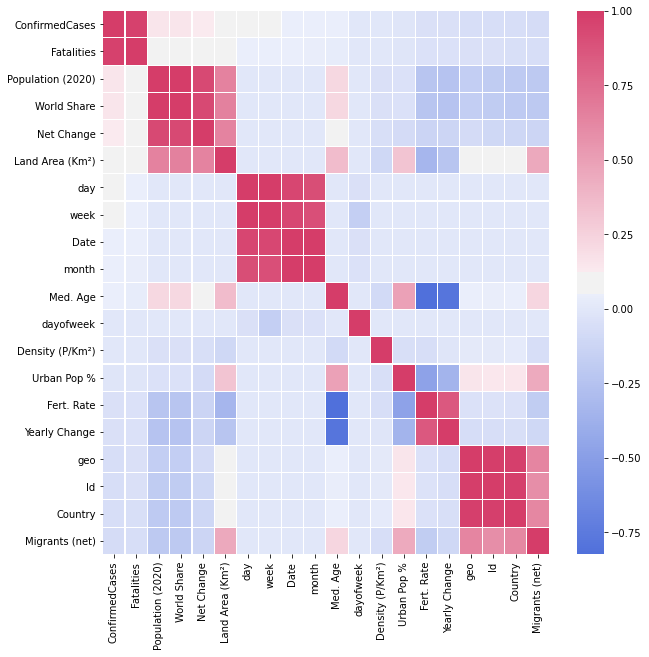

In [142]:
# ConfirmedCases correlation matrix 
# k : number of variables for heatmap 
k = 50
  
cols = corrmat.nlargest(k, 'ConfirmedCases')['ConfirmedCases'].index 
  
cm = np.corrcoef(X_train[cols].values.T) 
f, ax = plt.subplots(figsize =(10, 10)) 
  
sns.heatmap(cm, ax = ax, cmap =sns.diverging_palette(-100,0,as_cmap=True), 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

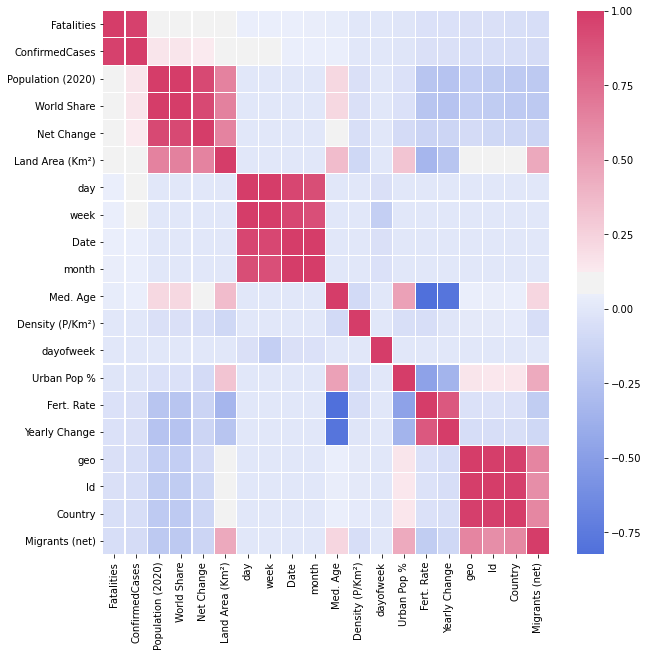

In [141]:
#Fatlities correlation matrix
k = 50
  
cols = corrmat.nlargest(k, 'Fatalities')['Fatalities'].index 
  
cm = np.corrcoef(X_train[cols].values.T) 
f, ax = plt.subplots(figsize =(10, 10)) 
  
sns.heatmap(cm, ax = ax, cmap =sns.diverging_palette(-100,0,as_cmap=True), 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

In [43]:
corr_matrix = X_train.corr()
print(corr_matrix['ConfirmedCases'].sort_values(),'\n' '\n',corr_matrix['Fatalities'].sort_values())

Migrants (net)      -0.075263
Id                  -0.059069
Yearly Change       -0.044777
Fert. Rate          -0.042444
Urban Pop %         -0.013675
Density (P/Km²)     -0.003961
dayofweek           -0.003404
Med. Age             0.045943
month                0.048047
Date                 0.050580
week                 0.054186
day                  0.054460
Land Area (Km²)      0.070278
Net Change           0.127567
World Share          0.152650
Population (2020)    0.152664
Fatalities           0.973960
ConfirmedCases       1.000000
year                      NaN
Name: ConfirmedCases, dtype: float64 

 Migrants (net)      -0.060061
Id                  -0.046956
Yearly Change       -0.036597
Fert. Rate          -0.033505
Urban Pop %         -0.011948
dayofweek           -0.003985
Density (P/Km²)     -0.003896
Med. Age             0.036326
month                0.044137
Date                 0.046743
week                 0.050772
day                  0.050933
Land Area (Km²)      0.055380


**Comparing Correlation to ConfirmedCases and Fatalities**

* Number of **Cases** and **Fatalities** are strongly correlated
* **Cases** have small positive correlation with *Population size, world share contribution, net change of population*
* **Fatalities** have small positive correlation with *Population size, World share contribution, net change of population size*

* Least correlated dayofweek and Density


**Prepare Input Data**



In [44]:
#Input with One-Hot-Encoder and StandardScaler
target = X_train.iloc[:, 4:6]
print(X_train.shape, target.shape)

features_drop = ['ConfirmedCases', 'Province_State','Fatalities', 'Id', 'Density (P/Km²)', 'dayofweek']
X = X_train.drop(features_drop, axis=1)
Y= X_test.drop(['ForecastId', 'Province_State', 'Density (P/Km²)', 'dayofweek'], axis = 1)
print (X, '\n', Y)

(16758, 22) (16758, 2)
           Country  Date  Population (2020)  ...  week  day           geo
0      Afghanistan   122           38742911  ...     4   22  Afghanistan_
1      Afghanistan   123           38742911  ...     4   23  Afghanistan_
2      Afghanistan   124           38742911  ...     4   24  Afghanistan_
3      Afghanistan   125           38742911  ...     4   25  Afghanistan_
4      Afghanistan   126           38742911  ...     4   26  Afghanistan_
...            ...   ...                ...  ...   ...  ...           ...
20562     Zimbabwe   314           14818157  ...    11   74     Zimbabwe_
20563     Zimbabwe   315           14818157  ...    11   75     Zimbabwe_
20564     Zimbabwe   316           14818157  ...    12   76     Zimbabwe_
20565     Zimbabwe   317           14818157  ...    12   77     Zimbabwe_
20566     Zimbabwe   318           14818157  ...    12   78     Zimbabwe_

[16758 rows x 16 columns] 
            Country  Date  Population (2020)  ...  week  day 

In [0]:
#Input with label endoding and MinMaxScaler
y_cases = X_train['ConfirmedCases']
y_fatalities = X_train['Fatalities']

features_drop = ['ConfirmedCases', 'Province_State','Fatalities', 'Id', 'Density (P/Km²)', 'dayofweek']
X_train_full = X_train.drop(features_drop, axis=1)

forecastId = X_test['ForecastId']
X_test_full = X_test.drop(['ForecastId', 'Province_State', 'Density (P/Km²)', 'dayofweek'], axis=1)

**Categrocial Encoding**

In [47]:
label_encoding = preprocessing.LabelEncoder()

X_train_full.Country = label_encoding.fit_transform(X_train_full.Country)
X_train_full.geo = label_encoding.fit_transform(X_train_full.geo)
X_test_full.Country = label_encoding.fit_transform(X_test_full.Country)
X_test_full.geo = label_encoding.fit_transform(X_test_full.geo)

print(X_train_full.head(), '\n', X_test_full.head())

   Country  Date  Population (2020)  Yearly Change  ...  month  week  day  geo
0        0   122           38742911           2.33  ...      1     4   22    0
1        0   123           38742911           2.33  ...      1     4   23    0
2        0   124           38742911           2.33  ...      1     4   24    0
3        0   125           38742911           2.33  ...      1     4   25    0
4        0   126           38742911           2.33  ...      1     4   26    0

[5 rows x 16 columns] 
    Country  Date  Population (2020)  Yearly Change  ...  month  week  day  geo
0        0   319           38742911           2.33  ...      3    12   79    0
1        0   320           38742911           2.33  ...      3    12   80    0
2        0   321           38742911           2.33  ...      3    12   81    0
3        0   322           38742911           2.33  ...      3    12   82    0
4        0   323           38742911           2.33  ...      3    13   83    0

[5 rows x 16 columns]


**Data Scaling**: Handling disparities in units!<br>
https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339

*MinMax Scaler*: scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [50]:
scaler = MinMaxScaler()
X_train_full = scaler.fit_transform(X_train_full.values)
X_test_full = scaler.transform(X_test_full.values)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train.values)
# X_test = scaler.transform(X_test.values)
print (X_train_full.mean(), X_train_full.std(), '\n', X_test_full.mean(), X_test_full.std())

0.3745159677805236 0.3217915268487367 
 0.5854152180865211 0.5365351528137888


In [153]:
# # scaler = StandardScaler()
# # X_train_full = scaler.fit_transform(X_train_full.values)
# # X_test_full = scaler.transform(X_test_full.values)
# print (X_train_full.mean(), X_train_full.std(), '\n', X_test_full.mean(), X_test_full.std())

-3.015126114800653e-17 0.9718253158075499 
 0.6009100935591666 1.4561004277748089


**Train and validation set**

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train_full, target, test_size = 0.2, random_state = 0)

## Decision Tree Regressor

The decision trees is used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. As a result, it learns local linear regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.


In [179]:
# # Fit regression model : MODEL USING STANDARDSCALER INSTEAD OF MINMAX SCALER 
# tree_1 = DecisionTreeRegressor(max_depth=2)
# tree_2 = DecisionTreeRegressor(max_depth=10)
# tree_3 = DecisionTreeRegressor(max_depth=20)
# tree_1.fit(xtrain, ytrain)
# tree_2.fit(xtrain, ytrain)
# tree_3.fit(xtrain, ytrain)

# # Predict
# y_1 = tree_1.predict(xtest)
# y_2 = tree_2.predict(xtest)
# y_3 = tree_3.predict(xtest)

# mse_1 = mean_squared_error(ytest, y_1)
# mse_2 = mean_squared_error(ytest, y_2)
# mse_3 = mean_squared_error(ytest, y_3)
# rmse1 = np.sqrt(mse_1)
# rmse2 = np.sqrt(mse_2)
# rmse3 = np.sqrt(mse_3)
# rmsle1 = np.sqrt(mean_squared_log_error( ytest, y_1 ))
# rmsle2 = np.sqrt(mean_squared_log_error( ytest, y_2 ))
# rmsle3 = np.sqrt(mean_squared_log_error( ytest, y_3 ))

# # The coefficients
# #print('Coefficients: \n', tree_1.coef_, tree_2.coef_, tree_3.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mse_1, mse_2, mse_3)
# # Root Mean Squared Error
# print("Root Mean Squared Error: ", rmse1, rmse2, rmse3)
# #Root Mean Saure Log Error
# print("RMSLE: ", rmsle1, rmsle2, rmsle3)
# # Explained variance score: 1 is perfect prediction
# print('Variance score:', r2_score(ytest, y_1),
#       r2_score(ytest, y_2),
#       r2_score(ytest, y_3))

Mean squared error: 5394357.68 33781.04000946297 21729.636653336038
Root Mean Squared Error:  2322.5756574939583 183.7961914987984 147.40975765985112
RMSLE:  2.325332349518997 0.6382759382676386 0.30423528786636866
Variance score: 0.05269693173272533 0.9916931200946189 0.9926298496951558


In [54]:
# Fit regression model
tree_1 = DecisionTreeRegressor(max_depth=2)
tree_2 = DecisionTreeRegressor(max_depth=10)
tree_3 = DecisionTreeRegressor(max_depth=20)
tree_1.fit(xtrain, ytrain)
tree_2.fit(xtrain, ytrain)
tree_3.fit(xtrain, ytrain)

# Predict
y_1 = tree_1.predict(xtest)
y_2 = tree_2.predict(xtest)
y_3 = tree_3.predict(xtest)

mse_1 = mean_squared_error(ytest, y_1)
mse_2 = mean_squared_error(ytest, y_2)
mse_3 = mean_squared_error(ytest, y_3)
rmse1 = np.sqrt(mse_1)
rmse2 = np.sqrt(mse_2)
rmse3 = np.sqrt(mse_3)
rmsle1 = np.sqrt(mean_squared_log_error( ytest, y_1 ))
rmsle2 = np.sqrt(mean_squared_log_error( ytest, y_2 ))
rmsle3 = np.sqrt(mean_squared_log_error( ytest, y_3 ))

# The coefficients
#print('Coefficients: \n', tree_1.coef_, tree_2.coef_, tree_3.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mse_1, mse_2, mse_3)
# Root Mean Squared Error
print("Root Mean Squared Error: ", rmse1, rmse2, rmse3)
#Root Mean Saure Log Error
print("RMSLE: ", rmsle1, rmsle2, rmsle3)
# Explained variance score: 1 is perfect prediction
print('Variance score:', r2_score(ytest, y_1),
      r2_score(ytest, y_2),
      r2_score(ytest, y_3))

Mean squared error: 4980938.41 12483.09172811224 9480.693042909581
Root Mean Squared Error:  2231.8016053040014 111.727757196286 97.36885047544507
RMSLE:  2.539611426270808 0.7864281104560578 0.3550370144204417
Variance score: 0.06103050416344952 0.9976441420884643 0.9980039449220998


In [56]:
tree_4 = DecisionTreeRegressor(max_depth=100)
tree_4.fit(xtrain, ytrain)
y_4 = tree_4.predict(xtest)
mse_4 = mean_squared_error(ytest, y_4)
rmse4 = np.sqrt(mse_4)
rmsle4 = np.sqrt(mean_squared_log_error( ytest, y_4 ))

print(mse_4, rmse4, rmsle4) #higher max depth reduces error score

9396.514170644392 96.93561868912991 0.3365344034678863


## Random Forest Regressor

Making pipeline
* StandardScaler to standardize numericals features.
* OneHotEncoder to make dummies in categorical features.
* ColumnTransformer to run previus two steps.
* The estimator RandomForestRegressor.


In [0]:
xt, xv, yt, yv = train_test_split(X, target, test_size = 0.2, random_state = 0)

In [58]:
Nums = Pipeline( #standardize numerical features
    steps = [
        ('imputer', SimpleImputer(strategy = 'median')), 
        ('scaler' , StandardScaler())
    ])

Cat = Pipeline( #dummies for categorical features
    steps = [
        ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')), 
        ('onehot' , OneHotEncoder(handle_unknown = 'ignore'))
    ])

Transformer = ColumnTransformer( #combine standardscale and onehotencoder
    n_jobs = -1
    , transformers = [
        ('num', Nums, xt.select_dtypes(include = ['int64','float64']).columns)
        , ('cat', Cat, xt.select_dtypes(include = ['object']).columns)
    ])

Model = Pipeline(
    steps = [
        ('Prepo', Transformer)
        , ('Clf', RandomForestRegressor(n_jobs = -1
                                        , random_state = 42)) 
    ])

Model.fit(xt, yt)

Model.score(xt, yt)

#Future Warning: sklearn.metrics.r2_score - R^2 (coefficient of determination) regression score function.
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
#from sklearn.metrics import r2_score
#r2_score[y_true, y_pred]

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').



0.9996292714988755

In [59]:
y_pred  = Model.predict(xv)

# The coefficients
# print('Coefficients: \n', Model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(yv, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yv, y_pred))

Mean squared error: 4657.06
Variance score: 1.00


In [60]:
rf_mse = mean_squared_error(yv, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmsle = np.sqrt(mean_squared_log_error( yv, y_pred ))

print('RMSE', rf_rmse, '\n', 'RMSLE', rf_rmsle)

RMSE 68.24267590086365 
 RMSLE 0.19930721842626192


**Second attempt**

In [61]:
###MIN MAX SCALER###
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))

regr_multirf.fit(xtrain, ytrain)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(xtrain, ytrain)

# Predict on new data
y_multirf = regr_multirf.predict(xtest)
y_rf = regr_rf.predict(xtest)

mse1_multi = mean_squared_error(ytest, y_multirf)
mse2_rf = mean_squared_error(ytest, y_rf)
rmse1_multi = np.sqrt(mse1_multi)
rmse2_rf = np.sqrt(mse2_rf)
rmsle1_multi = np.sqrt(mean_squared_log_error( ytest, y_multirf ))
rmsle2_rf = np.sqrt(mean_squared_log_error( ytest, y_rf ))

# The mean squared error
print("Mean squared error: %.2f" % mse1_multi, mse2_rf)
# Root Mean Squared Error
print("Root Mean Squared Error: ", rmse1_multi, rmse2_rf)
#Root Mean Saure Log Error
print("RMSLE: ", rmsle1_multi, rmsle2_rf)
# Explained variance score: 1 is perfect prediction
print('Variance score:', r2_score(ytest, y_multirf),
      r2_score(ytest, y_rf))

Mean squared error: 19915.61 19297.00910712839
Root Mean Squared Error:  141.12268521024836 138.91367501843865
RMSLE:  0.40998693309349576 0.40699283201269826
Variance score: 0.9868765333197869 0.9930686988159676


In [184]:
####STANDARD SCALER###
# max_depth = 30
# regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
#                                                           max_depth=max_depth,
#                                                           random_state=0))

# regr_multirf.fit(xtrain, ytrain)

# regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
#                                 random_state=2)
# regr_rf.fit(xtrain, ytrain)

# # Predict on new data
# y_multirf = regr_multirf.predict(xtest)
# y_rf = regr_rf.predict(xtest)

# mse1_multi = mean_squared_error(ytest, y_multirf)
# mse2_rf = mean_squared_error(ytest, y_rf)
# rmse1_multi = np.sqrt(mse1_multi)
# rmse2_rf = np.sqrt(mse2_rf)
# rmsle1_multi = np.sqrt(mean_squared_log_error( ytest, y_multirf ))
# rmsle2_rf = np.sqrt(mean_squared_log_error( ytest, y_rf ))

# # The mean squared error
# print("Mean squared error: %.2f" % mse1_multi, mse2_rf)
# # Root Mean Squared Error
# print("Root Mean Squared Error: ", rmse1_multi, rmse2_rf)
# #Root Mean Saure Log Error
# print("RMSLE: ", rmsle1_multi, rmsle2_rf)
# # Explained variance score: 1 is perfect prediction
# print('Variance score:', r2_score(ytest, y_multirf),
#       r2_score(ytest, y_rf))

Mean squared error: 28408.64 31507.70882318546
Root Mean Squared Error:  168.5486309484313 177.5041093135183
RMSLE:  0.4099794139425258 0.417136315594266
Variance score: 0.988961278361373 0.9894564955999965


### Linear Regression

In [62]:
lin_reg = LinearRegression()

lin_reg.fit(xtrain, ytrain)

y_pred = lin_reg.predict(xtest)
lin_mse = mean_squared_error(ytest, y_pred)
lin_rmse = np.sqrt(lin_mse)
#lin_rmsle= np.sqrt(mean_squared_log_error( ytest, y_pred )) #negative predictions - set predictions to 0?
lin_r2_score = r2_score(ytest, y_pred)

print(lin_mse, lin_rmse, lin_r2_score) #neg predictions - rmsle doens't work (could set neg predictions to 0, but lin_reg performs worst so far)

5162720.668580555 2272.16211318219 0.028039500338433332


## Neural Network



**Multi-output Regression with Keras Sequential Model** <br>

 Multi-output regression data contains more than one output value for a given input data. We can easily fit and predict this type of regression data with Keras neural networks API
 <br> https://www.datatechnotes.com/2019/12/multi-output-regression-example-with.html

In [64]:
#data prep

print("input shape:", xtrain.shape, "output shape:", ytrain.shape)
in_shape = xtrain.shape[1]
out_shape = ytrain.shape[1]

input shape: (13406, 16) output shape: (13406, 2)


In [65]:
#define Model
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import uniform
from numpy import hstack
model = Sequential()
model.add(Dense(100, input_dim=in_shape, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_shape))
model.compile(loss="mse", optimizer="adam")

Using TensorFlow backend.


In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 4,998
Trainable params: 4,998
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=0)

In [0]:
ypred = model.predict(xtest)
# print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0])) 
# print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

In [69]:
nn_mse = mean_squared_error(ytest, ypred)
nn_rmse = np.sqrt(nn_mse)
#nn_rmsle = np.sqrt(mean_squared_log_error( ytest, ypred))

print(nn_mse, nn_rmse)

5121983.522700779 2263.179958090116


**Neural Network Multioutput Regression** 
1. Input Layer
2. Hidden Layer (Multiple = Deep Neural network)  
3. Output Layers

Use of backpropagation training algorithm: Efficient technique for computing gradients of network's error automatically
= Finds out how each connection weight and bias term should be altered to reduce error


In [0]:
#split train set in train, valid, test 
x_train, x_valid, y_train, y_valid = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 0)

In [0]:
input_ = keras.layers.Input(shape=in_shape)
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation ="relu")(hidden1)
concat= keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
MLP_model = keras.Model(inputs=[input_], outputs=[output, aux_output])

In [74]:
MLP_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 300)          5100        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          30100       dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 116)          0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [0]:
MLP_model.compile(loss=["mse", "mse"], loss_weights=[0.5, 0.5], optimizer="adam")

In [76]:
MLP_model.fit(x_train, [y_train['ConfirmedCases'], y_train['Fatalities']], epochs=100, validation_data=(x_valid, [y_valid['ConfirmedCases'], y_valid['Fatalities']]))

Epoch 1/100
336/336 [==============================] - 1s 3ms/step - loss: 5575223.0000 - main_output_loss: 11131023.0000 - aux_output_loss: 19421.7754 - val_loss: 1388350.7500 - val_main_output_loss: 2771698.2500 - val_aux_output_loss: 5002.8101
Epoch 2/100
336/336 [==============================] - 1s 2ms/step - loss: 5478911.0000 - main_output_loss: 10938616.0000 - aux_output_loss: 19203.6230 - val_loss: 1392453.6250 - val_main_output_loss: 2779556.0000 - val_aux_output_loss: 5351.7031
Epoch 3/100
336/336 [==============================] - 1s 2ms/step - loss: 5420710.5000 - main_output_loss: 10822284.0000 - aux_output_loss: 19134.1875 - val_loss: 1411270.0000 - val_main_output_loss: 2817497.7500 - val_aux_output_loss: 5042.0659
Epoch 4/100
336/336 [==============================] - 1s 2ms/step - loss: 5402550.5000 - main_output_loss: 10785963.0000 - aux_output_loss: 19137.2695 - val_loss: 1441767.7500 - val_main_output_loss: 2878141.7500 - val_aux_output_loss: 5392.6587
Epoch 5/100


In [77]:
total_loss, main_loss, aux_loss = MLP_model.evaluate([xtest], [ytest['ConfirmedCases'], ytest['Fatalities']])

105/105 [==============================] - 0s 1ms/step - loss: 5107125.5000 - main_output_loss: 10196837.0000 - aux_output_loss: 17417.1758


In [78]:
rmse_net = np.sqrt(total_loss)
print(rmse_net, np.sqrt(main_loss), np.sqrt(aux_loss))

2259.895019685649 3193.248659281015 131.97414815504587


## Model selection and Fine Tuning

**Random Forest Regressor** - lowest error rate: higher max_depth improved prediction score


In [81]:
# tree_4 = DecisionTreeRegressor(max_depth=100)
# tree_4.fit(xtrain, ytrain)
# y_4 = tree_4.predict(xtest)
# mse_4 = mean_squared_error(ytest, y_4)
# rmse4 = np.sqrt(mse_4)
# rmsle4 = np.sqrt(mean_squared_log_error( ytest, y_4 ))

print('MSE:', mse_4, 'RMSE:', rmse4, 'RMSLE:', rmsle4) #higher max depth reduces error score

MSE: 9396.514170644392 RMSE: 96.93561868912991 RMSLE: 0.3365344034678863


In [83]:
Model #current RandomForestRegressor

Pipeline(memory=None,
         steps=[('Prepo',
                 ColumnTransformer(n_jobs=-1, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                      

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

rf = RandomForestRegressor(random_state = 42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [86]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 68.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 128.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [87]:
rf_random.best_params_ #best_parms

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

Test base_model and best_random model: WITH MINMAX SCALER AND featureEncoding


In [94]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

base_model = RandomForestRegressor(n_jobs = -1, random_state = 42)
base_model.fit(xtrain, ytrain)
predictions = base_model.predict(xtest)
base_rmse= np.sqrt(mean_squared_error(ytest, predictions))
base_rmsle = np.sqrt(mean_squared_log_error(ytest, predictions))

print('Model Performance')
print('RMSE:', base_rmse, 'RMSLE:', base_rmsle)

# mse_4 = mean_squared_error(ytest, y_4)
# rmse4 = np.sqrt(mse_4)
# rmsle4 = np.sqrt(mean_squared_log_error( ytest, y_4 ))


Model Performance
RMSE: 140.35914705683308 RMSLE: 0.41265968233831274


In [95]:
best_random = rf_random.best_estimator_
best_random.fit(xtrain, ytrain)
best_pred = best_random.predict(xtest)
best_rmse = np.sqrt(mean_squared_error(ytest, best_pred))
best_rmsle = np.sqrt(mean_squared_log_error(ytest, best_pred))

print('Model Performance')
print('RMSE:', best_rmse, 'RMSLE:', best_rmsle) #does not perform better?

Model Performance
RMSE: 155.56985284254705 RMSLE: 0.42305555637709313


In [96]:
best_random

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Test RandomForestRegressor with StandardScaler and OneHotEncoder


In [97]:
Nums = Pipeline( #standardize numerical features
    steps = [
        ('imputer', SimpleImputer(strategy = 'median')), 
        ('scaler' , StandardScaler())
    ])

Cat = Pipeline( #dummies for categorical features
    steps = [
        ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')), 
        ('onehot' , OneHotEncoder(handle_unknown = 'ignore'))
    ])

Transformer = ColumnTransformer( #combine standardscale and onehotencoder
    n_jobs = -1
    , transformers = [
        ('num', Nums, xt.select_dtypes(include = ['int64','float64']).columns)
        , ('cat', Cat, xt.select_dtypes(include = ['object']).columns)
    ])

Model = Pipeline(
    steps = [
        ('Prepo', Transformer)
        , ('Clf', best_random) 
    ])

Model.fit(xt, yt)

Model.score(xt, yt)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').



0.9996729047803775

In [98]:
y_pred  = Model.predict(xv)
rf_mse = mean_squared_error(yv, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmsle = np.sqrt(mean_squared_log_error( yv, y_pred ))

print('RMSE', rf_rmse, '\n', 'RMSLE', rf_rmsle) #improved score !!

RMSE 63.61136984756107 
 RMSLE 0.1976256990145833


In [114]:
mean_squared_error(yv, y_pred)

4046.406373883202

**Final Model**: Random Forest Regressor using best_params
Improved score with OneHotEncoder of Categorical variables and StandardScaler instead of MinMaxScaler

**Submission**


In [105]:
final_test = X_test.drop(['ForecastId', 'Province_State', 'Density (P/Km²)', 'dayofweek'], axis =1)
final_test

,Country,Date,Population (2020),Yearly Change,Net Change,Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,year,month,week,day,geo
0,Afghanistan,319,38742911,2.33,886592,652860,-62920.0,4.6,18,25,0.50,2020,3,12,79,Afghanistan_
1,Afghanistan,320,38742911,2.33,886592,652860,-62920.0,4.6,18,25,0.50,2020,3,12,80,Afghanistan_
2,Afghanistan,321,38742911,2.33,886592,652860,-62920.0,4.6,18,25,0.50,2020,3,12,81,Afghanistan_
3,Afghanistan,322,38742911,2.33,886592,652860,-62920.0,4.6,18,25,0.50,2020,3,12,82,Afghanistan_
4,Afghanistan,323,38742911,2.33,886592,652860,-62920.0,4.6,18,25,0.50,2020,3,13,83,Afghanistan_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,Zimbabwe,426,14818157,1.48,217456,386850,-116858.0,3.6,19,38,0.19,2020,4,17,117,Zimbabwe_
12638,Zimbabwe,427,14818157,1.48,217456,386850,-116858.0,3.6,19,38,0.19,2020,4,18,118,Zimbabwe_
12639,Zimbabwe,428,14818157,1.48,217456,386850,-116858.0,3.6,19,38,0.19,2020,4,18,119,Zimbabwe_
12640,Zimbabwe,429,14818157,1.48,217456,386850,-116858.0,3.6,19,38,0.19,2020,4,18,120,Zimbabwe_


In [0]:
final_pred = Model.predict(final_test)

In [109]:
final_pred = pd.DataFrame(final_pred)
final_pred

,0,1
0,21.2125,0.0075
1,21.2125,0.0075
2,21.2125,0.0075
3,21.2125,0.0075
4,21.2125,0.0075
...,...,...
12637,3.2625,0.0525
12638,3.2625,0.0525
12639,3.2625,0.0525
12640,3.2625,0.0525


In [111]:
tuned_output = pd.DataFrame({'ForecastId': test.ForecastId, 'ConfirmedCases': final_pred[0], 'Fatalities': final_pred[1]})
tuned_output

,ForecastId,ConfirmedCases,Fatalities
0,1,21.2125,0.0075
1,2,21.2125,0.0075
2,3,21.2125,0.0075
3,4,21.2125,0.0075
4,5,21.2125,0.0075
...,...,...,...
12637,12638,3.2625,0.0525
12638,12639,3.2625,0.0525
12639,12640,3.2625,0.0525
12640,12641,3.2625,0.0525


In [112]:
tuned_output.to_csv('second_sub.csv', index = False)

from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
!cp second_sub.csv "drive/My Drive/"